In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Embedding, LSTM, BatchNormalization, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv('/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv')
#email_df = pd.read_csv('combined_phishing_data.csv')
#email_df.drop('Unnamed: 0', axis = 1, inplace = True)
#url_df = df[['url','status']].copy()
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:

url_df = df[['url','status']].copy()

In [6]:
#Converting target variable into numerical form
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
#coding legitimate as 0 and phishing as 1
url_df["status"] = lb.fit_transform(url_df["status"])
lb = LabelEncoder()
url_df.head()

,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [7]:
url_df.head()

,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [8]:
combined_df = url_df.copy()

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
combined_df['text_tokenized'] = combined_df['url'].map(lambda t: tokenizer.tokenize(t)) # doing with all rows
combined_df.sample(10)

,url,status,text_tokenized
286,https://www.techlahoma.org/,0,"[https, www, techlahoma, org]"
5803,https://www.msi.com/comparison/vga,0,"[https, www, msi, com, comparison, vga]"
9751,https://magalu-crediario.com/Produto_64913/pro...,1,"[https, magalu, crediario, com, Produto, produ..."
5140,http://templat65sldh.myfreesites.net/,1,"[http, templat, sldh, myfreesites, net]"
4712,http://definition.org/define/compact+disc,0,"[http, definition, org, define, compact, disc]"
8335,https://jimryky.blogspot.com/2018/11/seacle.html,1,"[https, jimryky, blogspot, com, seacle, html]"
9178,http://www.rezulteo-shina.ru/,0,"[http, www, rezulteo, shina, ru]"
4187,http://office365-login-outlook.el.r.appspot.co...,1,"[http, office, login, outlook, el, r, appspot,..."
3426,http://dostigator.guru,0,"[http, dostigator, guru]"
9946,http://snip.li/HudCS,1,"[http, snip, li, HudCS]"


In [10]:
stemmer = SnowballStemmer("english")
combined_df['text_stemmed'] = combined_df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
combined_df['text_sent'] = combined_df['text_stemmed'].map(lambda l: ' '.join(l))
combined_df.head()

,url,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,0,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
1,http://shadetreetechnology.com/V4/validation/a...,1,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,1,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
3,http://rgipt.ac.in,0,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,0,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park


In [11]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(combined_df.text_sent)
t.word_index['<PAD>'] = 0

In [12]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('mypublicdomainpictur', 18437), ('<PAD>', 0), 1)

In [13]:
text_sequences = t.texts_to_sequences(combined_df.text_sent)

In [14]:
# pad dataset to a maximum review length in words
MAX_SEQUENCE_LENGTH = 2000
input_data = sequence.pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH)

input_data.shape

(11430, 2000)

In [15]:
input_data = sequence.pad_sequences(input_data, maxlen=MAX_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = train_test_split(input_data, combined_df.status, stratify = combined_df.status, test_size=0.20, random_state=0)

In [16]:
X_train.shape

(9144, 2000)

In [17]:
VOCAB_SIZE = len(t.word_index)
VOCAB_SIZE

18438

In [18]:
def construct_cnn_model():
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 300, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model
cnn_model = construct_cnn_model()
cnn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 300)         5531400   
                                                                 
 conv1d (Conv1D)             (None, 2000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1  (None, 1000, 128)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1000, 64)          32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 500, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 500, 32)           8

In [29]:
cnn_model.fit(X_train, y_train, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
458/458 [==============================] - 10s 21ms/step - loss: 7.9374e-04 - accuracy: 0.9997 - val_loss: 0.5269 - val_accuracy: 0.9016
Epoch 2/5
458/458 [==============================] - 10s 21ms/step - loss: 0.0985 - accuracy: 0.9906 - val_loss: 0.3766 - val_accuracy: 0.9328
Epoch 3/5
458/458 [==============================] - 9s 20ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.5749 - val_accuracy: 0.8999
Epoch 4/5
458/458 [==============================] - 9s 20ms/step - loss: 9.7708e-04 - accuracy: 0.9996 - val_loss: 0.3345 - val_accuracy: 0.9174
Epoch 5/5
458/458 [==============================] - 9s 20ms/step - loss: 3.1989e-04 - accuracy: 0.9999 - val_loss: 0.4359 - val_accuracy: 0.9185


72/72 [==============================] - 1s 10ms/step
Confusion Matrix:
 [[0.92825897 0.07174103]
 [0.10061242 0.89938758]] 

Overall Accuracy: 0.9138232720909887
Overall Precision: 0.9261261261261261
Overall Recall: 0.8993875765529309
AUC: 0.9719992896775917


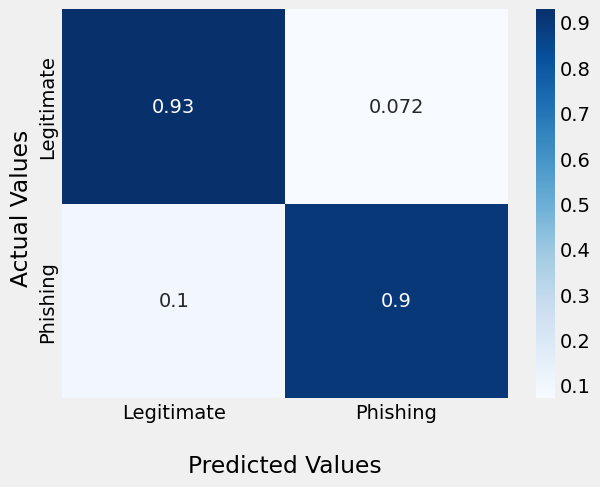

fpr:  [0.         0.00524934 0.00524934 0.00524934 0.00699913 0.00699913
 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913
 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913
 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913 0.00699913
 0.00699913 0.00699913 0.00699913 0.00874891 0.00874891 0.0096238
 0.0096238  0.0096238  0.0096238  0.0096238  0.0096238  0.0096238
 0.0096238  0.01049869 0.01049869 0.01049869 0.01137358 0.01137358
 0.01224847 0.01224847 0.01487314 0.01487314 0.01574803 0.01574803
 0.01662292 0.01662292 0.01749781 0.01749781 0.0183727  0.0183727
 0.01924759 0.01924759 0.02012248 0.02012248 0.02099738 0.02099738
 0.02187227 0.02187227 0.02362205 0.02362205 0.02449694 0.02449694
 0.02537183 0.02537183 0.02624672 0.02624672 0.02712161 0.02712161
 0.0279965  0.0279965  0.02887139 0.02887139 0.03062117 0.03062117
 0.03149606 0.03149606 0.03499563 0.03499563 0.03674541 0.03674541
 0.0376203  0.0376203  0.03937008 0.03937008 0.04024497 0.0

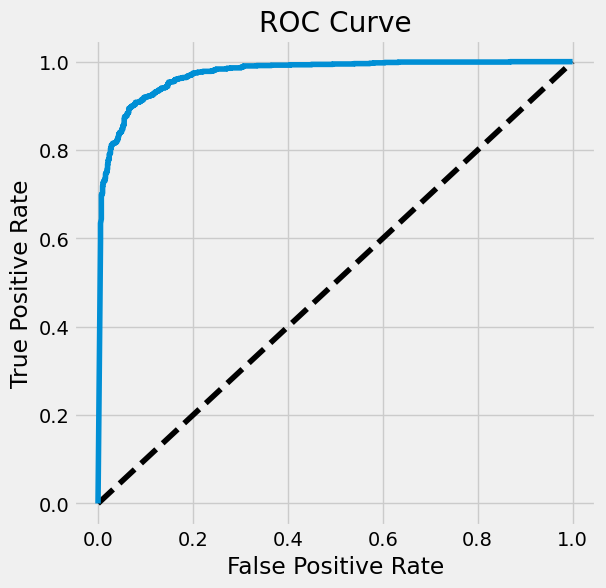

In [53]:
from sklearn. metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns

def evaluate_Model(model):
  # Get predictions from test data
  #y_scores = model.predict(X_test)
  #predictions = np.argmax(y_scores, axis = 1)
    y_scores= model.predict(X_test).ravel()
    predictions=[0 if i <= 0.5 else 1 for i in y_scores  ]


    # Get evaluation metrics
    cm = confusion_matrix(y_test, predictions, normalize = "true")
    print('============================================')
    print ('Confusion Matrix:\n',cm, '\n')
    #print('Accuracy:', accuracy_score(y_test, predictions))
    print("Overall Accuracy:",accuracy_score(y_test, predictions))
    print("Overall Precision:",precision_score(y_test, predictions))
    print("Overall Recall:",recall_score(y_test, predictions))
    auc = roc_auc_score(y_test,y_scores)
    print('AUC: ' + str(auc))
    print('============================================')
    ax = sns.heatmap(cm,cmap='Blues', annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(predictions)))
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');


    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legitimate','Phishing'])
    ax.yaxis.set_ticklabels(['Legitimate','Phishing'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print('============================================')
    print('============================================')
    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    print("fpr: ", fpr)
    print("tpr: ", tpr)
    print("thresholds: ", thresholds)
    print('============================================')
    print('============================================')
    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

evaluate_Model(cnn_model)

## LSTM DEVELOPMENT

In [31]:
def construct_model():
    lstm_model = Sequential()
    lstm_model.add(Embedding(VOCAB_SIZE, 300, input_length=MAX_SEQUENCE_LENGTH))
    #First layer LSTM
    lstm_model.add(LSTM(128, return_sequences=True))
    lstm_model.add(BatchNormalization())
    lstm_model.add(Dropout(0.3))
    #Second layer LSTM
    lstm_model.add(LSTM(64))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(256, activation = 'relu'))
    lstm_model.add(BatchNormalization())
    lstm_model.add(Dropout(0.3))
    lstm_model.add(Dense(1, activation = "sigmoid"))
    return lstm_model

lstm_model = construct_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2000, 300)         5531400   
                                                                 
 lstm_4 (LSTM)               (None, 2000, 128)         219648    
                                                                 
 batch_normalization_4 (Bat  (None, 2000, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 2000, 128)         0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [32]:
lstm_model.fit(X_train, y_train, epochs = 2, validation_split=0.2, batch_size=16)

Epoch 1/2
458/458 [==============================] - 75s 154ms/step - loss: 0.4245 - accuracy: 0.8087 - val_loss: 0.2612 - val_accuracy: 0.8901
Epoch 2/2
458/458 [==============================] - 61s 132ms/step - loss: 0.1783 - accuracy: 0.9423 - val_loss: 0.1914 - val_accuracy: 0.9202


72/72 [==============================] - 4s 51ms/step
Confusion Matrix:
 [[0.95275591 0.04724409]
 [0.12510936 0.87489064]] 

Overall Accuracy: 0.9138232720909887
Overall Precision: 0.9487666034155597
Overall Recall: 0.8748906386701663
AUC: 0.9737571080080432


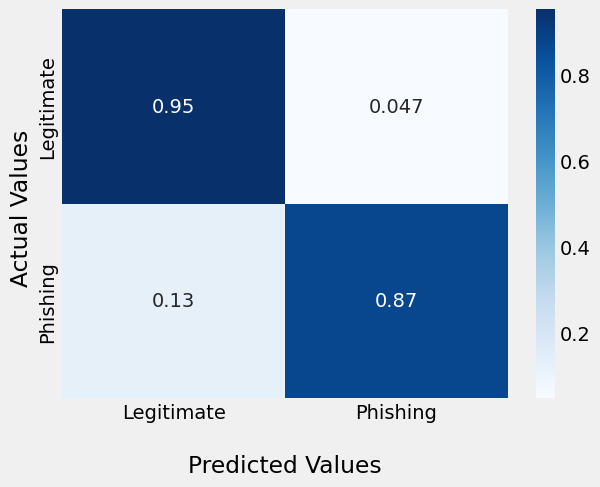

fpr:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 1.74978128e-03 1.74978128e-03 1.74978128e-03
 1.74978128e-03 1.74978128e-03 1.74978128e-03 1.74978128e-03
 1.74978128e-03 1.74978128e-03 1.74978128e-03 3.49956255e-03
 3.49956255e-03 4.37445319e-03 4.37445319e-03 4.37445319e-03
 5.24934383e-03 5.24934383e-03 6.12423447e-03 6.12423447e-03
 6.99912511e-03 6.99912511e-03 7.87401575e-03 7.87401575e-03
 7.87401575e-03 7.87401575e-03 8.74890639e-03 8.74890639e-03
 9.62379703e-03 9.

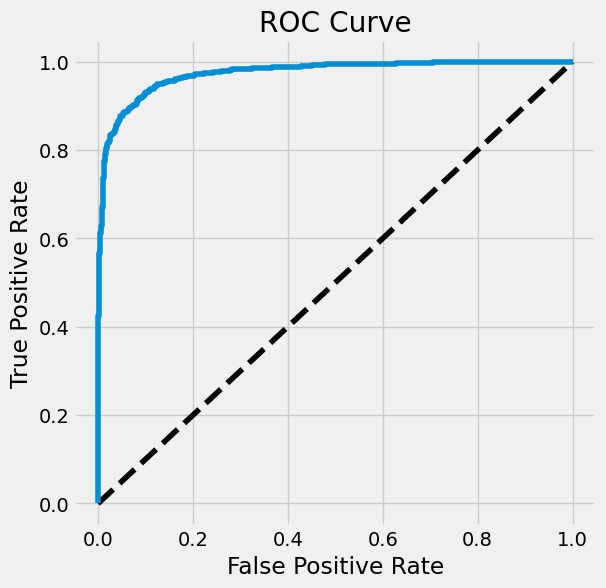

In [54]:
evaluate_Model(lstm_model)

## GRU MODEL

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, BatchNormalization, Dropout, Dense

def construct_gru_model():
    gru_model = Sequential()
    gru_model.add(Embedding(VOCAB_SIZE, 300, input_length=MAX_SEQUENCE_LENGTH))
    
    # First layer GRU
    gru_model.add(GRU(128, return_sequences=True))
    gru_model.add(BatchNormalization())
    gru_model.add(Dropout(0.3))
    
    # Second layer GRU
    gru_model.add(GRU(64))
    gru_model.add(Dropout(0.3))
    
    # Dense layers
    gru_model.add(Dense(256, activation='relu'))
    gru_model.add(BatchNormalization())
    gru_model.add(Dropout(0.3))
    
    # Output layer
    gru_model.add(Dense(1, activation='sigmoid'))
    
    return gru_model


In [42]:
gru_model = construct_model()
gru_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
gru_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 2000, 300)         5531400   
                                                                 
 lstm_8 (LSTM)               (None, 2000, 128)         219648    
                                                                 
 batch_normalization_8 (Bat  (None, 2000, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 2000, 128)         0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                      

In [43]:
gru_model.fit(X_train, y_train, epochs = 10, validation_split=0.2, batch_size=16)

Epoch 1/10
458/458 [==============================] - 76s 156ms/step - loss: 0.4251 - accuracy: 0.8119 - val_loss: 1.2265 - val_accuracy: 0.5675
Epoch 2/10
458/458 [==============================] - 60s 131ms/step - loss: 0.1687 - accuracy: 0.9461 - val_loss: 0.3385 - val_accuracy: 0.8753
Epoch 3/10
458/458 [==============================] - 60s 132ms/step - loss: 0.0773 - accuracy: 0.9779 - val_loss: 0.5046 - val_accuracy: 0.8207
Epoch 4/10
458/458 [==============================] - 59s 129ms/step - loss: 0.0502 - accuracy: 0.9869 - val_loss: 0.8504 - val_accuracy: 0.7879
Epoch 5/10
458/458 [==============================] - 59s 129ms/step - loss: 0.0388 - accuracy: 0.9896 - val_loss: 2.3508 - val_accuracy: 0.4959
Epoch 6/10
458/458 [==============================] - 60s 130ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.2334 - val_accuracy: 0.8967
Epoch 7/10
458/458 [==============================] - 60s 130ms/step - loss: 0.0453 - accuracy: 0.9889 - val_loss: 0.3865 - val_ac

72/72 [==============================] - 4s 51ms/step
Confusion Matrix:
 [[0.48993876 0.51006124]
 [0.00874891 0.99125109]] 

Overall Accuracy: 0.7405949256342957
Overall Precision: 0.6602564102564102
Overall Recall: 0.9912510936132983
AUC: 0.9673144531474248


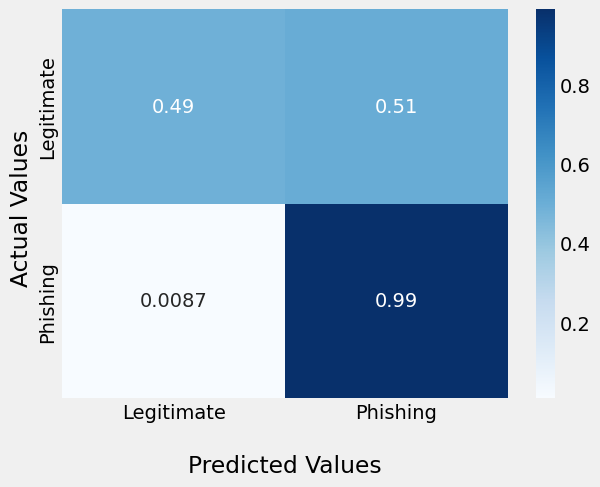

fpr:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.74890639e-04 8.74890639e-04 8.74890639e-04
 8.74890639e-04 8.

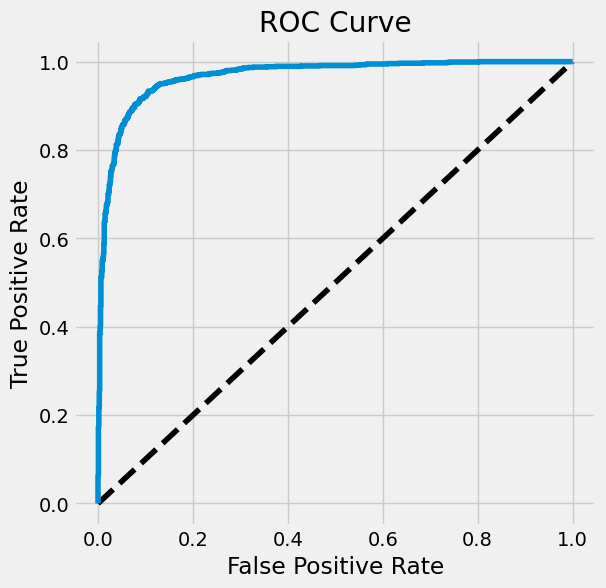

In [55]:
evaluate_Model(gru_model)

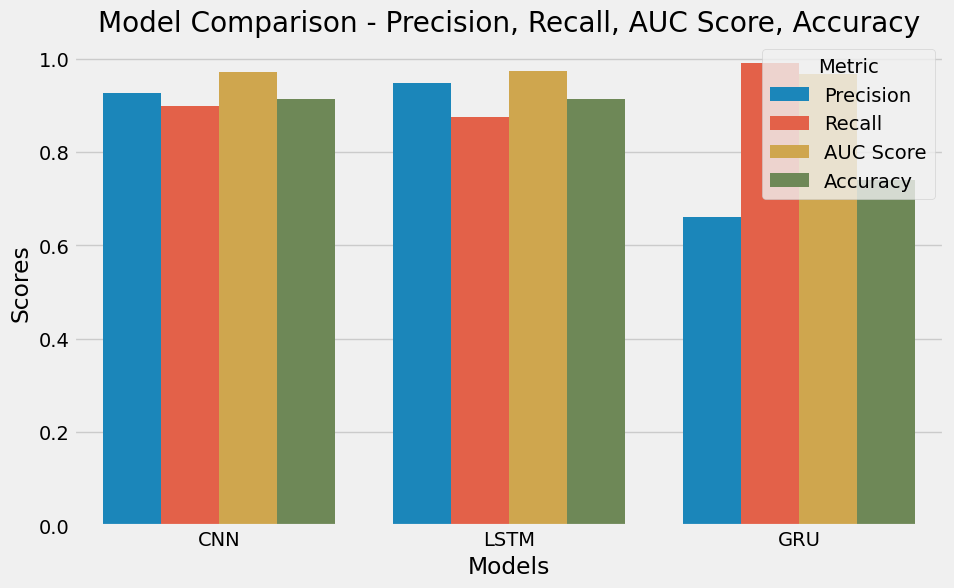

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['CNN', 'LSTM', 'GRU'],
    'Precision': [0.9261, 0.9487, 0.6602],
    'Recall': [0.8993, 0.8748, 0.9912],
    'AUC Score': [0.9720, 0.9737, 0.9673],
    'Accuracy': [0.9138, 0.9138, 0.7405],
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format for Seaborn
df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, )

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison - Precision, Recall, AUC Score, Accuracy')

# Show the plot
plt.show()

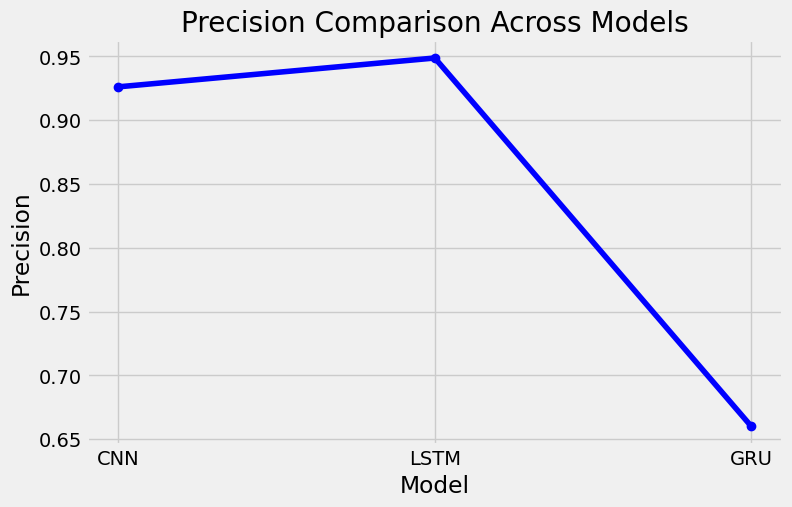

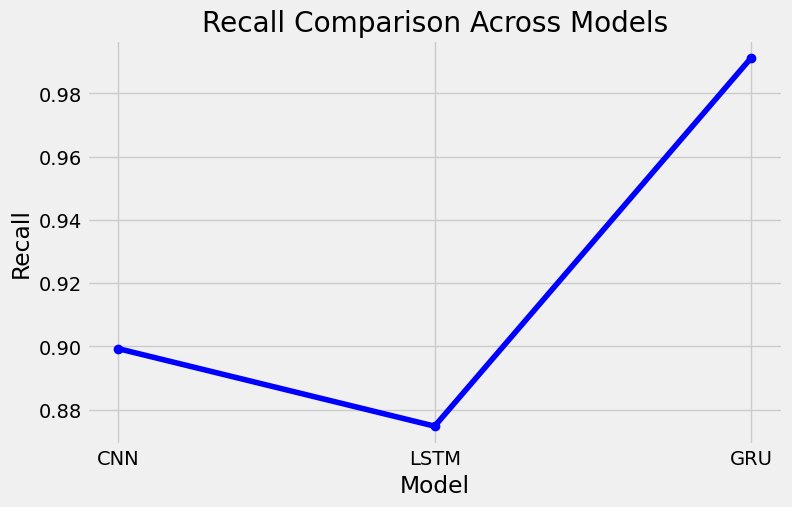

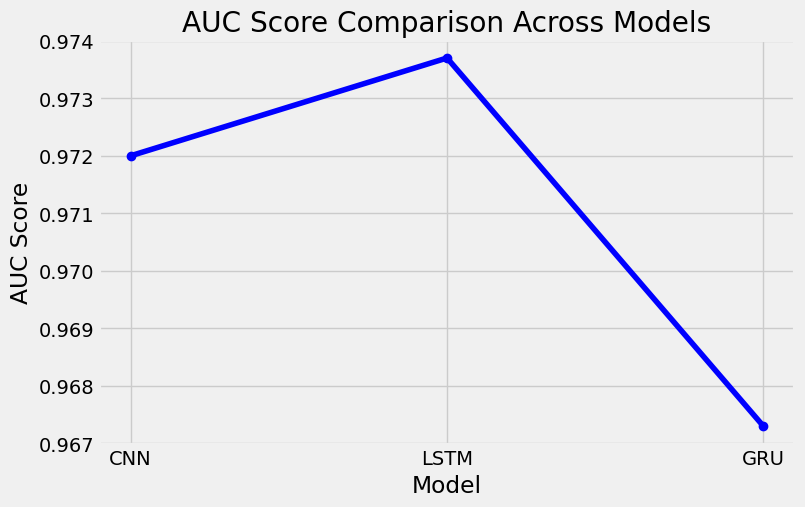

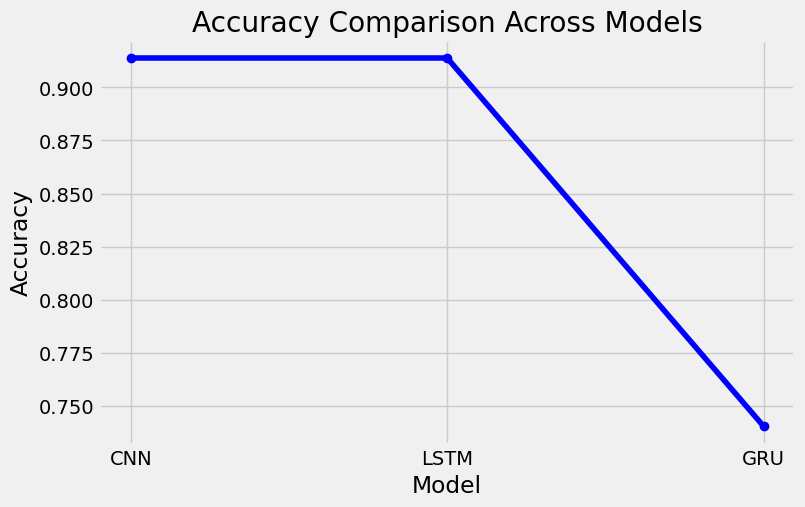

In [59]:
import matplotlib.pyplot as plt

data = {
    'Model': ['CNN', 'LSTM', 'GRU'],
    'Precision': [0.9261, 0.9487, 0.6602],
    'Recall': [0.8993, 0.8748, 0.9912],
    'AUC Score': [0.9720, 0.9737, 0.9673],
    'Accuracy': [0.9138, 0.9138, 0.7405],
}

# Create separate line charts for each metric
metrics = ['Precision', 'Recall', 'AUC Score', 'Accuracy']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(data['Model'], data[metric], marker='o', linestyle='-', color='b')
    plt.title(f'{metric} Comparison Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


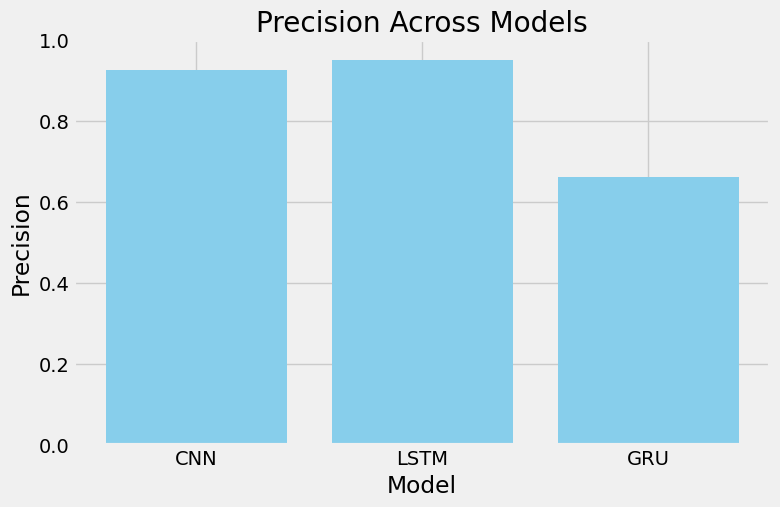

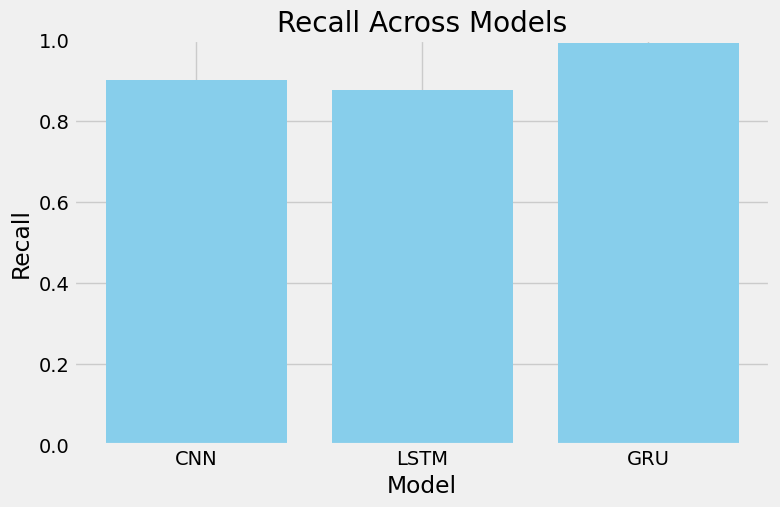

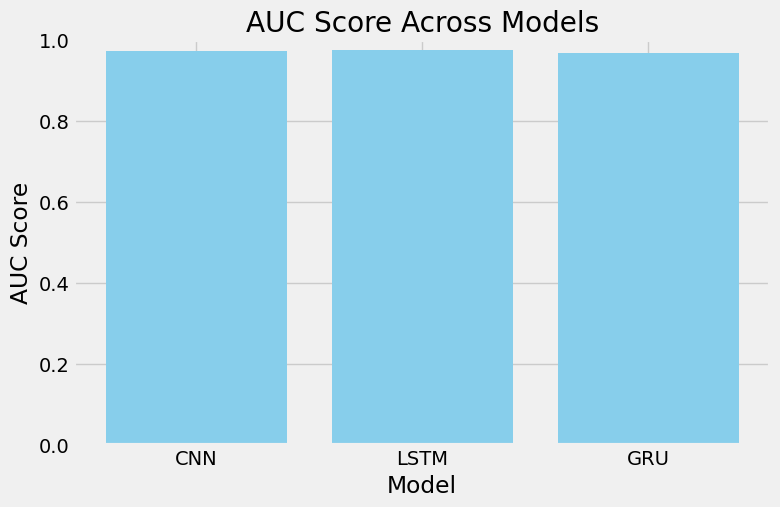

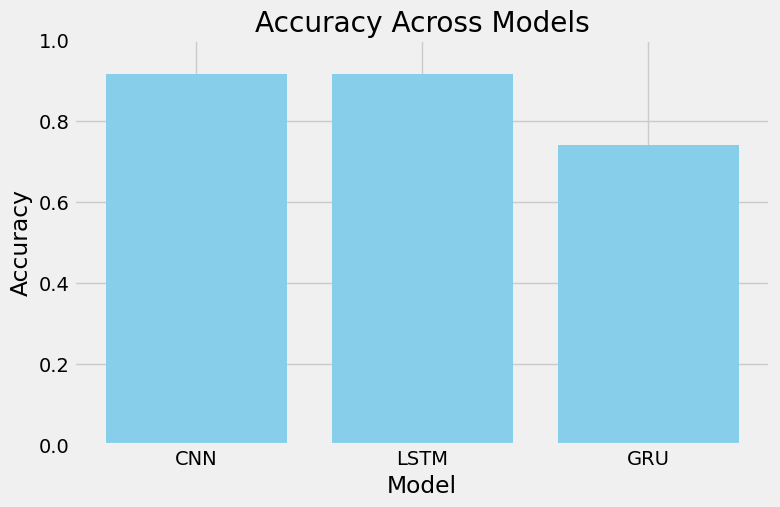

In [61]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Model': ['CNN', 'LSTM', 'GRU'],
    'Precision': [0.9261, 0.9487, 0.6602],
    'Recall': [0.8993, 0.8748, 0.9912],
    'AUC Score': [0.9720, 0.9737, 0.9673],
    'Accuracy': [0.9138, 0.9138, 0.7405],
}

# Create a separate plot for each metric
for metric in ['Precision', 'Recall', 'AUC Score', 'Accuracy']:
    plt.figure(figsize=(8, 5))
    plt.bar(data['Model'], data[metric], color='skyblue')
    plt.title(f'{metric} Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Adjust y-axis limits if needed
    plt.show()


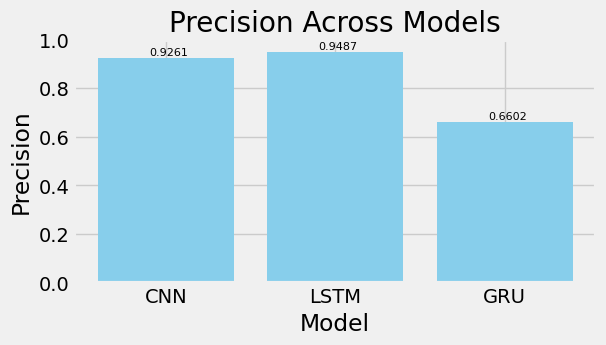

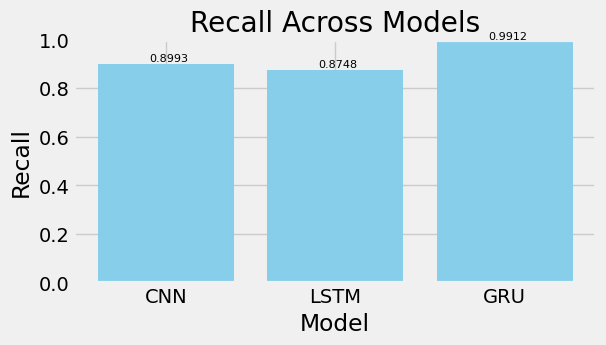

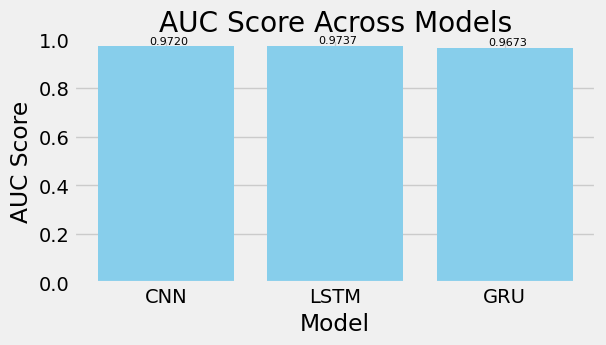

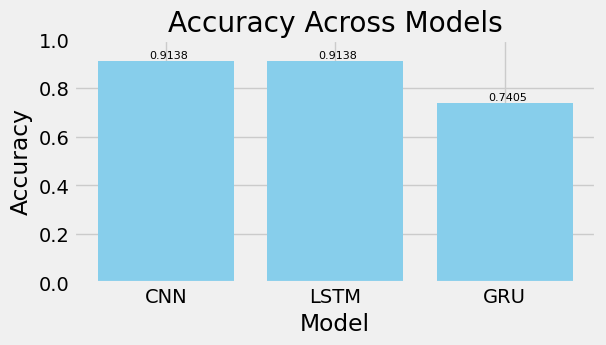

In [64]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Model': ['CNN', 'LSTM', 'GRU'],
    'Precision': [0.9261, 0.9487, 0.6602],
    'Recall': [0.8993, 0.8748, 0.9912],
    'AUC Score': [0.9720, 0.9737, 0.9673],
    'Accuracy': [0.9138, 0.9138, 0.7405],
}

# Create a separate plot for each metric
for metric in ['Precision', 'Recall', 'AUC Score', 'Accuracy']:
    plt.figure(figsize=(6, 3))
    bars = plt.bar(data['Model'], data[metric], color='skyblue')
    plt.title(f'{metric} Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Adjust y-axis limits if needed

    # Add actual values as text labels on each bar
    for bar, value in zip(bars, data[metric]):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.4f}', fontsize=8)

    plt.show()
